In [22]:
from torchvision.models import resnet18, ResNet18_Weights
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

class Predictor(nn.Module):
    def __init__(self):
        super().__init__()
        weights = ResNet18_Weights.DEFAULT
        self.resnet18 = resnet18(weights=weights, progress=False).eval()
        self.transforms = weights.transforms(antialias=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        with torch.no_grad():
            x = self.transforms(x)
            y_pred = self.resnet18(x)
            return y_pred.argmax(dim=1)
        
predictor = Predictor()

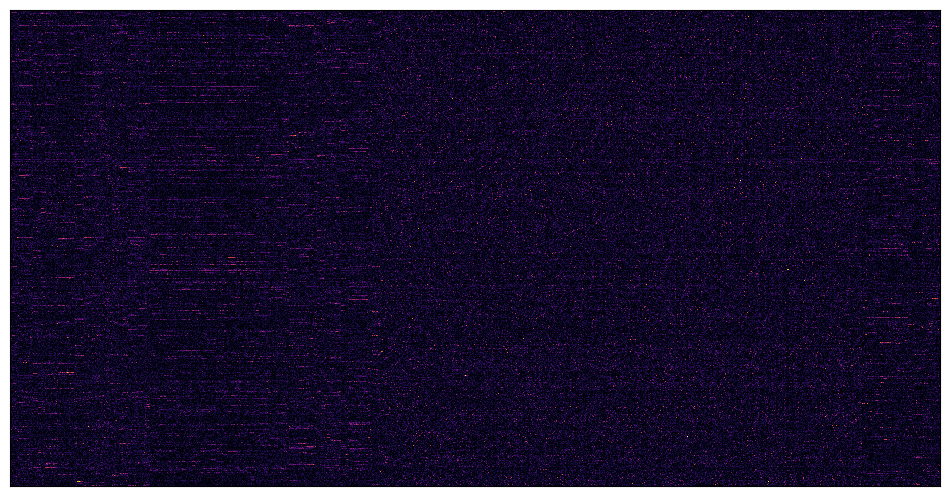

In [21]:
fc = predictor.resnet18.fc.weight.detach().numpy()
W_ = abs(fc)
vmin, vmax = W_.min(), W_.max()
fig, ax = plt.subplots(figsize=(12, 40))
im1 = ax.imshow(W_.T, cmap='inferno', interpolation='nearest', vmin=vmin, vmax=vmax)
ax.set_xticks([]); ax.set_yticks([]);

In [25]:
eigenvalues_fc, eigenvectors_fc = np.linalg.eig(fc.T @ fc)
# Might get some complex dust due to precision.
eigenvalues_fc = np.real(eigenvalues_fc)
eigenvectors_fc = np.real(eigenvectors_fc)

In [38]:
resnet18_init = resnet18()
fc_init = resnet18_init.fc.weight.detach().numpy()
eigenvalues_fc_init, eigenvectors_fc_init = np.linalg.eig(fc_init.T @ fc_init)
# Might get some complex dust due to precision.
eigenvalues_fc_init = np.real(eigenvalues_fc_init)
eigenvectors_fc_init = np.real(eigenvectors_fc_init)

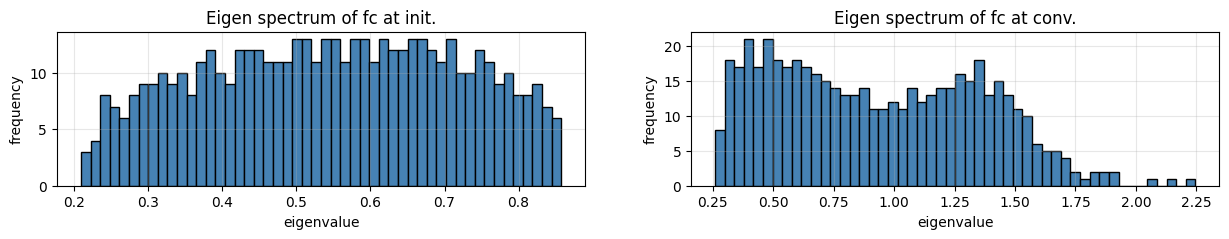

In [42]:
# same with histograms of spectrum.
plt.figure(figsize=(15, 2))

plt.subplot(1, 2, 1)
plt.hist(np.log(np.sqrt(eigenvalues_fc_init)+1), bins=50, color='steelblue', edgecolor='black')
plt.title('Eigen spectrum of fc at init.')
plt.xlabel('eigenvalue')
plt.ylabel('frequency')
plt.grid(alpha=0.3)
#plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(np.log(np.sqrt(eigenvalues_fc)+1), bins=50, color='steelblue', edgecolor='black')
plt.title('Eigen spectrum of fc at conv.')
plt.xlabel('eigenvalue')
plt.ylabel('frequency')
plt.grid(alpha=0.3)
#plt.yscale('log')

In [35]:
predictor.resnet18.conv1.weight.shape

torch.Size([64, 3, 7, 7])

In [36]:
predictor.resnet18.conv1

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)